In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from os.path import join as os_path_join

import electrical_analysis.models.touchstone as ts
from electrical_analysis.output.plot_tools import savefigure

In [2]:
xfcn = lambda M_ : M_.getfrequency()/1e9
yfcn = lambda M_ : 20.0*np.log10(np.abs(M_.getTrace('d2', 'd1')))

In [3]:
sp_path = r'../lab04_channel_sim_w_ibis/models/sp'
fig_path = r'../lab04_channel_sim_w_ibis/figures'

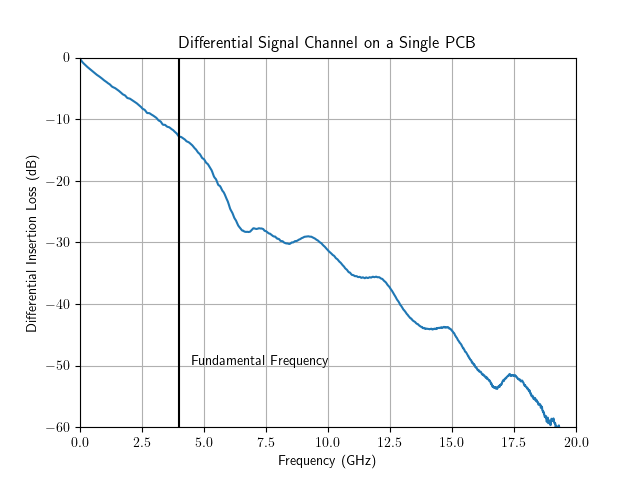

In [4]:
ts_file = os_path_join(sp_path, 'tx_d4pa_cal20100317.s4p')

M = ts.readmodel(ts_file, oe_ordering=True).toMixedMode()


fig, ax = plt.subplots(1,1)

ax.plot(xfcn(M), yfcn(M))
ax.grid(True)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Differential Insertion Loss (dB)')
ax.set_xlim(0,20)
ax.set_ylim(-60,0)

ax.axvline(4, color='k')
ax.text(4.5, -50, 'Fundamental Frequency')
ax.set_title('Differential Signal Channel on a Single PCB')

savefigure(fig, 'carrier_card_channel_sdd21', path=fig_path)

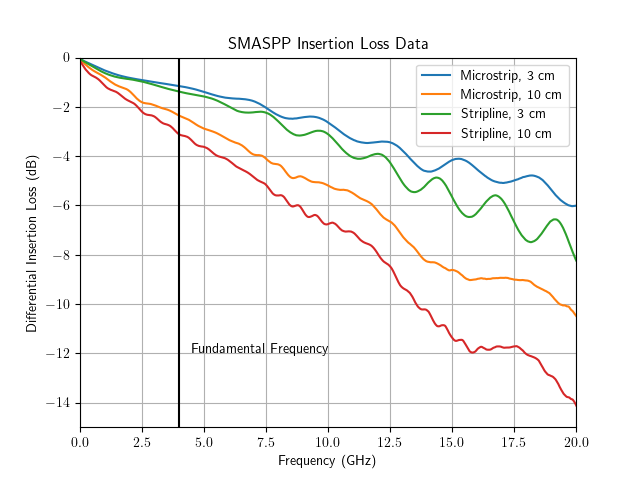

In [5]:
ts_file = os_path_join(sp_path, 'smaspp3z_bot_diff_3cm.s4p')
Mbot03 = ts.readmodel(ts_file, oe_ordering=False).toMixedMode()

ts_file = os_path_join(sp_path, 'smaspp3z_bot_diff_10cm.s4p')
Mbot10 = ts.readmodel(ts_file, oe_ordering=False).toMixedMode()

ts_file = os_path_join(sp_path, 'smaspp3z_s03_diff_3cm.s4p')
Ms0303 = ts.readmodel(ts_file, oe_ordering=False).toMixedMode()

ts_file = os_path_join(sp_path, 'smaspp3z_s03_diff_10cm.s4p')
Ms0310 = ts.readmodel(ts_file, oe_ordering=False).toMixedMode()

fig, ax = plt.subplots(1,1)

ax.plot(xfcn(Mbot03), yfcn(Mbot03), label='Microstrip, 3 cm')
ax.plot(xfcn(Mbot10), yfcn(Mbot10), label='Microstrip, 10 cm')
ax.plot(xfcn(Ms0303), yfcn(Ms0303), label='Stripline, 3 cm')
ax.plot(xfcn(Ms0310), yfcn(Ms0310), label='Stripline, 10 cm')

ax.grid(True)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Differential Insertion Loss (dB)')
ax.set_xlim(0,20)
ax.set_ylim(-15,0)
leg1 = ax.legend(loc='best')

ax.axvline(4, color='k')
ax.text(4.5, -12, 'Fundamental Frequency')
ax.set_title('SMASPP Insertion Loss Data')

savefigure(fig, 'smaspp_sdd21', path=fig_path)